In [73]:
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
import operator
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [74]:
class KNN:
    def __init__(self, metric='euclidean', k=6, p=3):
        self.metric = metric
        self.k=k
        self.p=p
 #euclidean distance       
    def straightLineDistance(self, row1,row2,length):
        distance=0
        for x in range(length):
            distance = distance+pow((row1[x]-row2[x]),2)
        return math.sqrt(distance)

    def p_root(self, value, root): 
        root_value = 1 / float(root) 
        return round (float(value) ** float(root_value), 3) 
  
    def minkowski_distance(self, x, y):   
        return (self.p_root(sum(pow(abs(a-b), self.p) for a, b in zip(x, y)), self.p))
    
    def manhattan_distance(self, x, y, n):
        sum = 0
        for i in range(n): 
            for j in range(i+1,n): 
                sum += (abs(x[i] - x[j]) + abs(y[i] - y[j])) 
        return sum
    
    def closestNeighbour(self, trainSet, testCase, k):
        distance=[]
        length = len(testCase)
        for x in range(len(trainSet)):
            if self.metric == 'euclidean':
                dist = self.straightLineDistance(testCase,trainSet[x], length)
            elif self.metric == 'minkowski':
                dist = self.minkowski_distance(testCase,trainSet[x])
            elif self.metric == 'manhattan':
                dist = self.manhattan_distance(testCase,trainSet[x], length)
            distance.append((trainSet[x],dist))
        distance.sort(key=operator.itemgetter(1))
        neighbour=[]
        for x in range(k):
            neighbour.append(distance[x][0])
        return neighbour
    
    def getResponse(self, neighbour):
        highestClass={}
        for x in range(len(neighbour)):
            labels=neighbour[x][-1]
            if labels in highestClass:
                highestClass[labels]= highestClass[labels]+1
            else:
                highestClass[labels]=1
        #sorting the nearest neighbours in descending order
        sortedLabels=sorted(highestClass.items(), key=operator.itemgetter(1), reverse=True)
        #returning the label which is most similar
        return sortedLabels[0][0]
    
    def knn(self, trainset_List, testset_list):
        predictions = []
        self.trainset_List = trainset_List
        self.testset_list = testset_list
        for x in range(len(trainset_List)):
            neighbors = self.closestNeighbour(trainset_List, testset_list[x], self.k)
            output = self.getResponse(neighbors)
            predictions.append(output)
#         return predictions
            print("predicted = ",output," expected = ",testset_list[x][-1])
        accepted=0;
        for x in range(len(testset_list)):
            if (testset_list[x][-1] ==  predictions[x]):
                accepted=accepted+1
        print("number of predictions which are correct :",accepted)
        accuracy= (accepted/float(len(testset_list))) * 100.0
        print("accuracy is ",accuracy)
        
    def check_best_k(self):
        arr = list()
        for k in range(1,21):
            predictions = []
            for x in range(len(trainset_List)):
                neighbors = self.closestNeighbour(trainset_List, testset_list[x], k)
                output = self.getResponse(neighbors)
                predictions.append(output)
    
            accepted = 0;
            for y in range(len(testset_list)):
                if (testset_list[y][-1] ==  predictions[y]):
                    accepted = accepted + 1
        
            accuracy = (accepted / float(len(testset_list))) * 100.0
            print("accuracy when k =",k,"is ",accuracy)
            arr.append(accuracy)
        print("Best k is :",arr.index(max(arr)) + 1)
        return arr
    
    

# Shuffling and splitting the dataset into test and train data 

In [75]:
df = pd.read_csv('diabetes.csv')
print("the diabetes dataset used consists of ",df.shape," number of rows and columns")

shuffle_df = df.sample(frac=1,random_state=10)
train_size=int(0.5*len(df))
print("After splitting the dataset: ")

train_set=shuffle_df[:train_size]
test_set=shuffle_df[train_size:]
print("training set :",len(train_set)," rows")
print("testing set :",len(test_set)," rows")

trainset_List=train_set.values.tolist()
testset_list=test_set.values.tolist()

the diabetes dataset used consists of  (768, 9)  number of rows and columns
After splitting the dataset: 
training set : 384  rows
testing set : 384  rows


In [76]:
# Predicting without Pre-Processing the dataset, using euclidean distance measure and k=6

In [77]:
model = KNN()
predictions = model.knn(trainset_List, testset_list)



predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  1.0
predicted =  1.0  expected =  0.0
predicted =  1.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  1.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  1

In [78]:
arr = model.check_best_k()

accuracy when k = 1 is  66.14583333333334
accuracy when k = 2 is  66.14583333333334
accuracy when k = 3 is  71.61458333333334
accuracy when k = 4 is  70.57291666666666
accuracy when k = 5 is  71.35416666666666
accuracy when k = 6 is  71.35416666666666
accuracy when k = 7 is  73.17708333333334
accuracy when k = 8 is  72.91666666666666
accuracy when k = 9 is  72.65625
accuracy when k = 10 is  73.95833333333334
accuracy when k = 11 is  73.95833333333334
accuracy when k = 12 is  73.17708333333334
accuracy when k = 13 is  73.69791666666666
accuracy when k = 14 is  73.4375
accuracy when k = 15 is  73.95833333333334
accuracy when k = 16 is  73.69791666666666
accuracy when k = 17 is  74.47916666666666
accuracy when k = 18 is  72.91666666666666
accuracy when k = 19 is  76.30208333333334
accuracy when k = 20 is  73.69791666666666
Best k is : 19


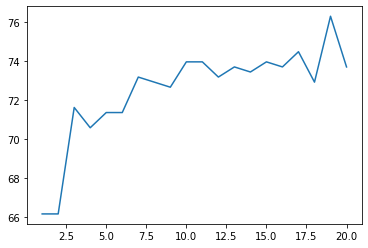

In [79]:
k_arr = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.figure()
plt.plot(k_arr, arr)

# Pre-Processing the dataset using standard scalar

In [80]:
df = pd.read_csv('diabetes.csv')
column_names = list(df.columns)
del column_names[-1]
print("Data without Pre-Processing\n")
print(df)
print("\n")


std = StandardScaler()
standard = std.fit_transform(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
standardDf = pd.DataFrame(standard, columns = column_names)
standardDf['Outcome'] = df['Outcome'].values
df = standardDf
df['Pregnancies'] = df['Pregnancies'].abs()
df['Glucose'] = df['Glucose'].abs()
df['BloodPressure'] = df['BloodPressure'].abs()
df['SkinThickness'] = df['SkinThickness'].abs()
df['Insulin'] = df['Insulin'].abs()
df['BMI'] = df['BMI'].abs()
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].abs()
df['Age'] = df['Age'].abs()

print("after using standard scalar and converting the negatives to absolute values\n")

print(df)

Data without Pre-Processing

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50  

In [81]:
#shuffling the dataset
shuffle_df = df.sample(frac=1,random_state=10)
train_size = int(0.5*len(df))
#splitting data into train and test
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

trainset_List=train_set.values.tolist()
testset_list=test_set.values.tolist()

In [82]:
#predicting using euclidean distance measure and having k=6
model = KNN()
predictions = model.knn(trainset_List, testset_list)

predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  1

In [83]:
arr = model.check_best_k()

accuracy when k = 1 is  97.13541666666666
accuracy when k = 2 is  97.13541666666666
accuracy when k = 3 is  96.35416666666666
accuracy when k = 4 is  96.61458333333334
accuracy when k = 5 is  95.83333333333334
accuracy when k = 6 is  97.39583333333334
accuracy when k = 7 is  95.05208333333334
accuracy when k = 8 is  96.61458333333334
accuracy when k = 9 is  95.57291666666666
accuracy when k = 10 is  96.61458333333334
accuracy when k = 11 is  94.79166666666666
accuracy when k = 12 is  95.83333333333334
accuracy when k = 13 is  94.01041666666666
accuracy when k = 14 is  95.57291666666666
accuracy when k = 15 is  94.53125
accuracy when k = 16 is  96.35416666666666
accuracy when k = 17 is  95.57291666666666
accuracy when k = 18 is  97.91666666666666
accuracy when k = 19 is  96.61458333333334
accuracy when k = 20 is  97.13541666666666
Best k is : 18


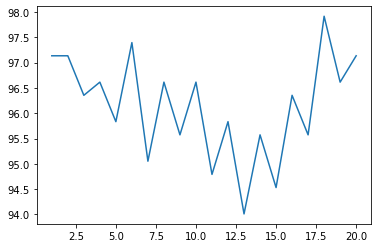

In [84]:
k_arr=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.figure()
plt.plot(k_arr, arr)

# # Normalizing the train data after it is Pre-Processed

In [85]:
df=pd.read_csv('diabetes.csv')
df2=pd.read_csv('diabetes.csv')
column_names=list(df.columns)

del column_names[-1]
std = StandardScaler()
standard = std.fit_transform(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
standardDf=pd.DataFrame(standard,columns=column_names)
standardDf['Pregnancies']=standardDf['Pregnancies'].abs()
standardDf['Glucose']=standardDf['Glucose'].abs()
standardDf['BloodPressure']=standardDf['BloodPressure'].abs()
standardDf['SkinThickness']=standardDf['SkinThickness'].abs()
standardDf['Insulin']=standardDf['Insulin'].abs()
standardDf['BMI']=standardDf['BMI'].abs()
standardDf['DiabetesPedigreeFunction']=standardDf['DiabetesPedigreeFunction'].abs()
standardDf['Age']=standardDf['Age'].abs()
standardDf['Outcome']=df['Outcome'].values
df=standardDf

#shuffling the dataset
shuffle_df=df.sample(frac=1,random_state=10)
train_size=int(0.5*len(df))
#splitting data into train and test
train_set=shuffle_df[:train_size]
test_set=shuffle_df[train_size:]
print("training set :",len(train_set)," rows")
print("testing set :",len(test_set)," rows\n")
ts=train_set
print("train set obtained after standard scaling the dataset\n")
print(train_set)
print("test set obtained after standard scaling the dataset\n")
print(test_set)

training set : 384  rows
testing set : 384  rows

train set obtained after standard scaling the dataset

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
568     0.046014  1.036107       0.149641       0.530902  0.401154  0.087901   
620     0.547919  0.278373       0.873409       1.346366  0.696373  0.813225   
456     0.844885  0.441461       0.780919       1.288212  0.692891  0.671730   
197     0.250952  0.434859       0.367337       0.472747  0.276112  1.154023   
714     0.250952  0.591345       0.253036       1.288212  0.692891  0.316356   
..           ...       ...            ...            ...       ...       ...   
14      0.342981  1.411672       0.149641       0.096379  0.826616  0.785957   
214     1.530847  0.278373       0.666618       0.719086  0.826616  0.280164   
410     0.639947  0.591345       1.080200       1.158182  0.692891  0.470543   
327     1.827813  1.818535       0.046245       1.288212  0.692891  0.394392   
160     0.04601

# Normalizing only the training set 

In [86]:
print("train_set after normalization\n")
train_set=preprocessing.normalize(train_set[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
train_set=pd.DataFrame(train_set,columns=column_names)
train_set['Outcome']=ts['Outcome'].values
print(train_set)

train_set after normalization

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.034161  0.769215       0.111095       0.394146  0.297821  0.065259   
1       0.251039  0.127542       0.400169       0.616864  0.319057  0.372595   
2       0.260495  0.136111       0.240773       0.397182  0.213632  0.207108   
3       0.141053  0.244421       0.206469       0.265717  0.155194  0.648642   
4       0.127890  0.301360       0.128952       0.656495  0.353109  0.161221   
..           ...       ...            ...            ...       ...       ...   
379     0.141836  0.583784       0.061882       0.039857  0.341839  0.325025   
380     0.713078  0.129668       0.310515       0.334955  0.385043  0.130502   
381     0.300328  0.277518       0.506939       0.543535  0.325174  0.220826   
382     0.586218  0.583243       0.014832       0.413157  0.222225  0.126490   
383     0.022546  0.461670       0.529280       0.536755  0.339505  0.142572   

     Dia

In [87]:
trainset_List=train_set.values.tolist()
testset_list=test_set.values.tolist()



In [88]:
#prediction for k=6 and euclidean distance measure

In [89]:
model = KNN()
predictions = model.knn(trainset_List, testset_list)

predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  1

In [90]:
arr = model.check_best_k()

accuracy when k = 1 is  100.0
accuracy when k = 2 is  100.0
accuracy when k = 3 is  100.0
accuracy when k = 4 is  100.0
accuracy when k = 5 is  100.0
accuracy when k = 6 is  100.0
accuracy when k = 7 is  100.0
accuracy when k = 8 is  100.0
accuracy when k = 9 is  100.0
accuracy when k = 10 is  100.0
accuracy when k = 11 is  99.73958333333334
accuracy when k = 12 is  100.0
accuracy when k = 13 is  100.0
accuracy when k = 14 is  100.0
accuracy when k = 15 is  100.0
accuracy when k = 16 is  100.0
accuracy when k = 17 is  100.0
accuracy when k = 18 is  100.0
accuracy when k = 19 is  100.0
accuracy when k = 20 is  100.0
Best k is : 1


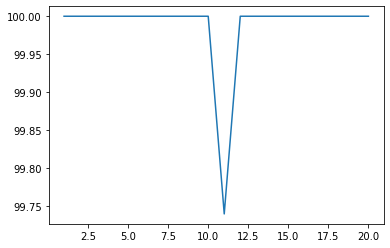

In [91]:
k_arr = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.figure()
plt.plot(k_arr, arr)

# Using different distance measure and different value for k

In [101]:
#using the same test and train data since it has given the best accuracy

In [93]:
#train data is standardized and normalized

In [94]:
#test data is only standardized


In [95]:
#using manhattan distance instead of euclidean
model = KNN(metric = 'manhattan', k=5, p=2)
predictions = model.knn(trainset_List, testset_list)

predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  1.0
predicted =  0

In [96]:
arr = model.check_best_k()

accuracy when k = 1 is  64.84375
accuracy when k = 2 is  64.84375
accuracy when k = 3 is  64.84375
accuracy when k = 4 is  64.84375
accuracy when k = 5 is  64.84375
accuracy when k = 6 is  64.84375
accuracy when k = 7 is  64.84375
accuracy when k = 8 is  64.84375
accuracy when k = 9 is  64.84375
accuracy when k = 10 is  64.84375
accuracy when k = 11 is  64.84375
accuracy when k = 12 is  64.84375
accuracy when k = 13 is  64.84375
accuracy when k = 14 is  64.84375
accuracy when k = 15 is  64.84375
accuracy when k = 16 is  64.84375
accuracy when k = 17 is  64.84375
accuracy when k = 18 is  64.84375
accuracy when k = 19 is  64.84375
accuracy when k = 20 is  64.84375
Best k is : 1


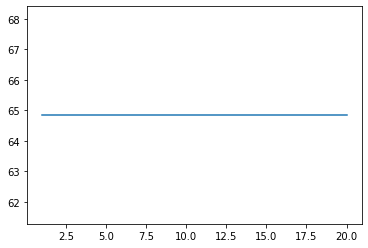

In [97]:
k_arr = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.figure()
plt.plot(k_arr, arr)

In [69]:
#using minkowski distance instead of euclidean

In [98]:
model = KNN(metric = 'minkowski', k=5, p=2)
predictions = model.knn(trainset_List, testset_list)

predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  0.0  expected =  0.0
predicted =  0.0  expected =  0.0
predicted =  1.0  expected =  1.0
predicted =  1

In [99]:
arr = model.check_best_k()

accuracy when k = 1 is  100.0
accuracy when k = 2 is  100.0
accuracy when k = 3 is  100.0
accuracy when k = 4 is  100.0
accuracy when k = 5 is  100.0
accuracy when k = 6 is  100.0
accuracy when k = 7 is  100.0
accuracy when k = 8 is  100.0
accuracy when k = 9 is  100.0
accuracy when k = 10 is  100.0
accuracy when k = 11 is  99.73958333333334
accuracy when k = 12 is  100.0
accuracy when k = 13 is  100.0
accuracy when k = 14 is  100.0
accuracy when k = 15 is  100.0
accuracy when k = 16 is  100.0
accuracy when k = 17 is  100.0
accuracy when k = 18 is  100.0
accuracy when k = 19 is  100.0
accuracy when k = 20 is  100.0
Best k is : 1


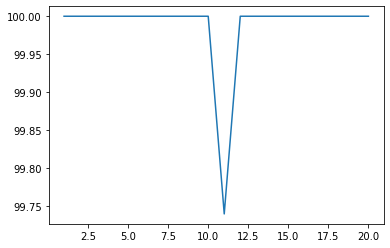

In [100]:
k_arr = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.figure()
plt.plot(k_arr, arr)